In [8]:
import numpy as np
import pandas as pd
# Creating a 2 dimensional numpy array
data= np.array([[ 10,80,0,100,1,56], [ 20,0,0,0,1,56],[ 20,80,0,0,1,56],[ 25,2,0,88,1,56],[30,80,0,100,1,56],[ 28,0,0,100,1,56]
               ,[ 80,0,10,0,1,56],[ 24,0,10,0,1,56]])

In [9]:
data

array([[ 10,  80,   0, 100,   1,  56],
       [ 20,   0,   0,   0,   1,  56],
       [ 20,  80,   0,   0,   1,  56],
       [ 25,   2,   0,  88,   1,  56],
       [ 30,  80,   0, 100,   1,  56],
       [ 28,   0,   0, 100,   1,  56],
       [ 80,   0,  10,   0,   1,  56],
       [ 24,   0,  10,   0,   1,  56]])

In [11]:
row=[]
row=np.array(row)
for i, index in enumerate(data):
#     print(i)
    row=np.append(row,i)
print(row.shape)
row = np.reshape(row, (-1, 1))
print(row.shape)
test_data=pd.DataFrame(data=data[0:,0:],    # values
             index=row[0:,0],    # 1st column as index
             columns=data[0,0:])  # 1st row as the column names
print(type(test_data))
# print(test_data)
test_data.columns = ['a', 'b','c','d','e','f']
test_data

(8,)
(8, 1)
<class 'pandas.core.frame.DataFrame'>


,a,b,c,d,e,f
0.0,10,80,0,100,1,56
1.0,20,0,0,0,1,56
2.0,20,80,0,0,1,56
3.0,25,2,0,88,1,56
4.0,30,80,0,100,1,56
5.0,28,0,0,100,1,56
6.0,80,0,10,0,1,56
7.0,24,0,10,0,1,56


In [12]:
test_data.dtypes

a    int64
b    int64
c    int64
d    int64
e    int64
f    int64
dtype: object

In [6]:
test_data_1 = test_data.apply(pd.to_numeric)

ValueError: ('Unable to parse string "a" at position 0', 'occurred at index string column')

In [4]:
w = test_data.drop(["string column"], axis=1)
w

,a,b,c,d,e,f
0.0,10,80,0,100,1,56
1.0,20,0,0,0,1,56
2.0,20,80,0,0,1,56
3.0,25,2,0,88,1,56
4.0,30,80,0,100,1,56
5.0,28,0,0,100,1,56
6.0,80,0,10,0,1,56
7.0,24,0,10,0,1,56


In [5]:
correl = w.corr()

In [6]:
correl

""


In [7]:
q = w.reset_index()

In [9]:
q

,index,a,b,c,d,e,f
0,0.0,10,80,0,100,1,56
1,1.0,20,0,0,0,1,56
2,2.0,20,80,0,0,1,56
3,3.0,25,2,0,88,1,56
4,4.0,30,80,0,100,1,56
5,5.0,28,0,0,100,1,56
6,6.0,80,0,10,0,1,56
7,7.0,24,0,10,0,1,56


In [11]:
e = q.corr()
e

,index
index,1.0


# drop string column

In [5]:
drop_object = test_data.select_dtypes(exclude=['object'])
drop_object

""
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


# drop column who has same value

In [6]:
nunique = test_data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
new_frame = test_data.drop(cols_to_drop, axis=1)

In [7]:
new_frame

,a,b,c,d
0.0,10,80,0,100
1.0,20,0,0,0
2.0,20,80,0,0
3.0,25,2,0,88
4.0,30,80,0,100
5.0,28,0,0,100
6.0,80,0,10,0
7.0,24,0,10,0


In [8]:
new_frame_1= test_data.drop(test_data.std()[(test_data.std() == 0)].index, axis=1)

In [10]:
type(new_frame_1)

pandas.core.frame.DataFrame

In [5]:
import matplotlib.pyplot as plt

print(test_data.shape)
plt.plot(test_data["a"], color = 'blue')
plt.plot(test_data["b"], color = 'red')
plt.plot(test_data["d"], color = 'black')
plt.legend(["a", "b","d"], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

(8, 6)


In [7]:
import numpy as np
count = []
for i , v in enumerate(test_data['b']):
    if v<80 and test_data.iloc[i]["d"]<100:
        count =  np.append(count,i)
        print('i: ',i,' ,b: ',v,' ,d: ',test_data.iloc[i]["d"])

TypeError: '<' not supported between instances of 'str' and 'int'

In [9]:
if count.size > 0:
    dataframe_1 = test_data.drop(count, axis=0)  # axis= 0 means row indiated. 1 means column indicated
else:
    dataframe_1 = test_data

In [10]:
test_data

,a,b,c,d
0.0,10,80,0,100
1.0,20,0,0,0
2.0,20,80,0,0
3.0,25,2,0,88
4.0,30,80,0,100
5.0,28,0,0,100
6.0,80,0,10,0
7.0,24,0,10,0


In [33]:
req_data=test_data.loc[(test_data['b']>=80) | (test_data['d']>=100)].values
req_frame=pd.DataFrame(req_data,columns=test_data.columns)

In [34]:
req_frame

,a,b,c,d
0,10,80,0,100
1,20,80,0,0
2,30,80,0,100
3,28,0,0,100


In [35]:
req_data_1=test_data.loc[(test_data['d']!=0)].values
req_frame_1=pd.DataFrame(req_data_1,columns=test_data.columns)

In [36]:
req_frame_1

,a,b,c,d
0,10,80,0,100
1,25,2,0,88
2,30,80,0,100
3,28,0,0,100


(5, 4)


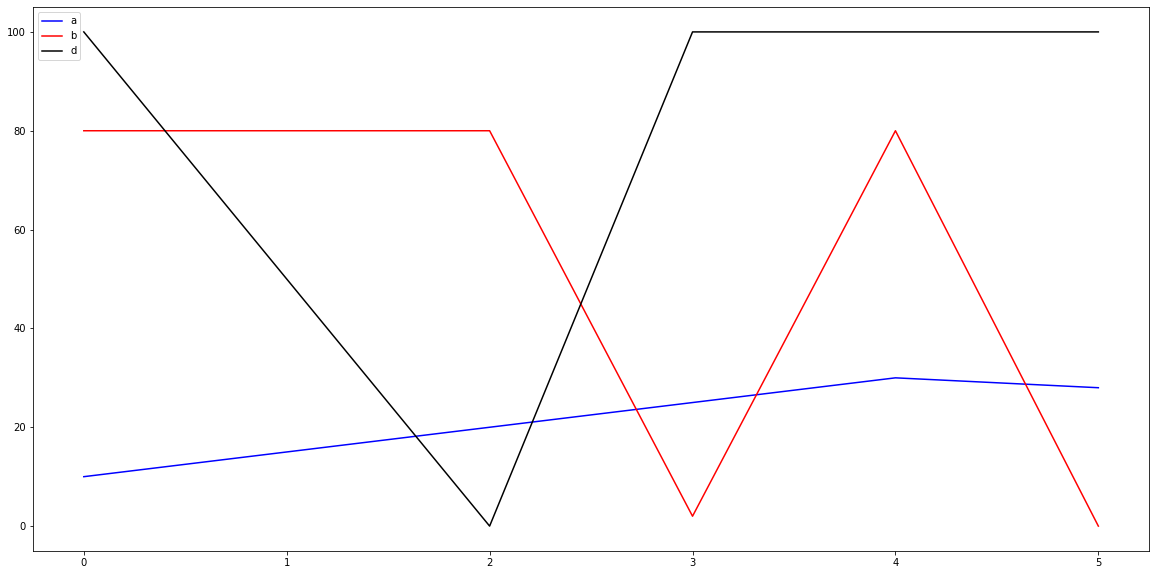

In [41]:
import matplotlib.pyplot as plt

print(dataframe_1.shape)
plt.plot(dataframe_1["a"], color = 'blue')
plt.plot(dataframe_1["b"], color = 'red')
plt.plot(dataframe_1["d"], color = 'black')
plt.legend(["a", "b","d"], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

In [21]:
new_data = test_data.assign(cMINUSd = test_data.c + test_data.d,
          aPLUSb = test_data.a - test_data.b)

In [32]:
row='ROW'
new_row=[]
new_row=np.array(new_row)
for i in range(0,new_data.shape[0]):
    row_1=str(row)+'_'+str(i)
    new_row = np.append(new_row,row_1)

print(new_row)

['ROW_0' 'ROW_1' 'ROW_2' 'ROW_3' 'ROW_4' 'ROW_5' 'ROW_6' 'ROW_7']


In [34]:
index_list=[]
index_list=np.array(index_list)
for i in range (0, new_data.shape[0]):
    index_1 = new_data.index[i]
    index_list = np.append(index_list,index_1)

print(index_list)

[0. 1. 2. 3. 4. 5. 6. 7.]


In [38]:
dict = {}
for A, B in zip(index_list, new_row):
    dict[A] = B

print(dict)

{0.0: 'ROW_0', 1.0: 'ROW_1', 2.0: 'ROW_2', 3.0: 'ROW_3', 4.0: 'ROW_4', 5.0: 'ROW_5', 6.0: 'ROW_6', 7.0: 'ROW_7'}


In [39]:
# for i in range (0, new_data.shape[0]):
new_data_new_row = new_data.rename(index=dict)

In [40]:
new_data_new_row

,a,b,c,d,cMINUSd,aPLUSb
ROW_0,5.8,80.0,10.0,70.0,80.0,-74.2
ROW_1,0.0,2.2,10.0,9.0,19.0,-2.2
ROW_2,-6.0,0.0,10.0,10.0,20.0,-6.0
ROW_3,6.0,2.2,10.0,0.0,10.0,3.8
ROW_4,6.0,2.2,10.0,20.0,30.0,3.8
ROW_5,-9.0,24.0,10.0,0.0,10.0,-33.0
ROW_6,6.0,2.2,10.0,50.0,60.0,3.8
ROW_7,65.0,2.0,10.0,0.0,10.0,63.0


In [8]:
drop_index=[]
drop_index=np.array(drop_index)
print(type(drop_index))
for index, value in test_data.iterrows():
#     print('value: ', value)
    for i , v in enumerate(value):
#         print('i: ',i)
#         print('v: ',v)
        if i == 3 and v == 0.0:
            print('index: ',index)
            
            drop_index=np.append(drop_index,index)

print('drop_index: ',drop_index)

<class 'numpy.ndarray'>
index:  3.0
index:  5.0
index:  7.0
drop_index:  [3. 5. 7.]


In [9]:
modify_frame=test_data.drop(drop_index,axis=0)

In [10]:
modify_frame

,a,b,c,d
0.0,5.8,80.0,10.0,70.0
1.0,0.0,2.2,10.0,9.0
2.0,-6.0,0.0,10.0,10.0
4.0,6.0,2.2,10.0,20.0
6.0,6.0,2.2,10.0,50.0


In [8]:
modify_frame.shape[1]

4

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

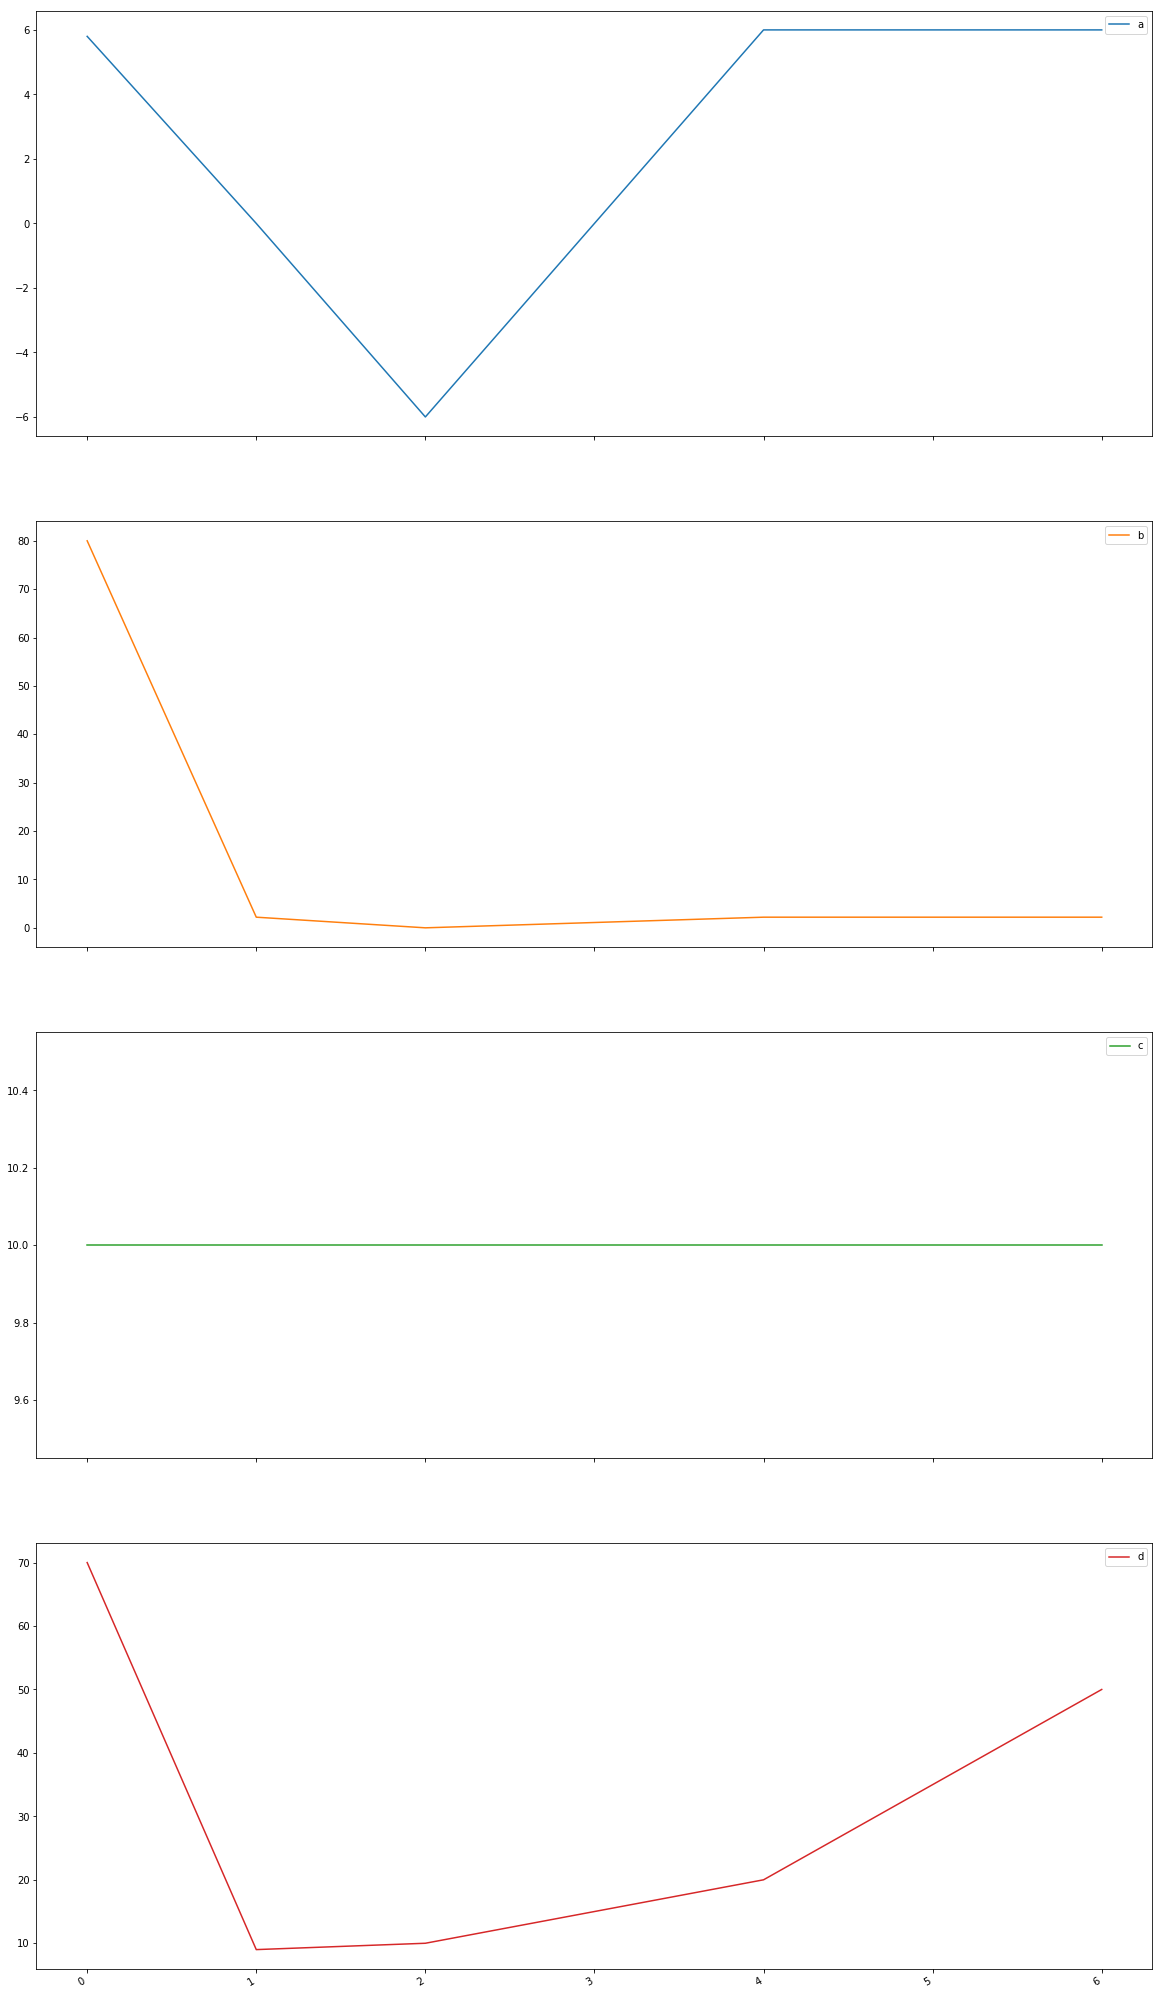

In [26]:
ax = modify_frame.plot(subplots=True, layout=(modify_frame.shape[1],1))
plt.rcParams['figure.figsize'] =(20,40)
# plt.tight_layout()
plt.savefig('test.png')
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()